In [1]:
#!pip install torch torchvision torchaudio
#!pip install opencv-python
#!pip install pandas
#!pip install requests
#!pip install numpy
#!pip install --upgrade torch opencv-python pandas requests numpy
#!pip install ultralytics
#!pip install squarify



In [2]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# Import Data from Kaggle

In [3]:
# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'ships-in-aerial-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2966898%2F5108768%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241002%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241002T035836Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D50f34ab29900438dae223a8b25bff9f23f4fa830b9961cfca20316c3994803d7ec8c8b72607e60fd27683e3791a6adc8a3676aa7c805a15db7fed0519602da2ca7fca1d602217a058cffcfeb412d840a2f30ec6cf243706a496c75e5f2dbb1f302cd3892766c698a0dbf5d22308d4419a67a41af4167034ac36fca3022a2a8fa1e78330a6f978d6401f082bdaa26530ef5bc7db3bec3ee3c64cfa298c588b7728fae31c11823a1b304276f3ba1683dc94e6700a40d2f2150cae65efe78a98666bf6ec722cbe3a720b8a798c959c9477d790b534cf30f9ce9c9eab82ca869274da18b69cd7939841bfaefe9bdb1fc47e9d7b772f2393a5820027993053a9919d2'

# # Set your desired local input and output paths
# KAGGLE_INPUT_PATH = 'input'   # Change this to your preferred input directory
# KAGGLE_WORKING_PATH = 'output'  # Change this to your preferred output directory

# # Create necessary directories locally
# os.makedirs(KAGGLE_INPUT_PATH, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, exist_ok=True)

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers.get('content-length')
#             if total_length:
#                 print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 if total_length:
#                     done = int(50 * dl / int(total_length))
#                     sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                     sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
            
#             # Extract the file based on its type
#             if filename.endswith('.zip'):
#                 with ZipFile(tfile) as zfile:
#                     zfile.extractall(destination_path)
#             else:
#                 with tarfile.open(tfile.name) as tarfile:
#                     tarfile.extractall(destination_path)
            
#             print(f'\nDownloaded and uncompressed: {directory}')
    
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


# Visualizing Sample Images

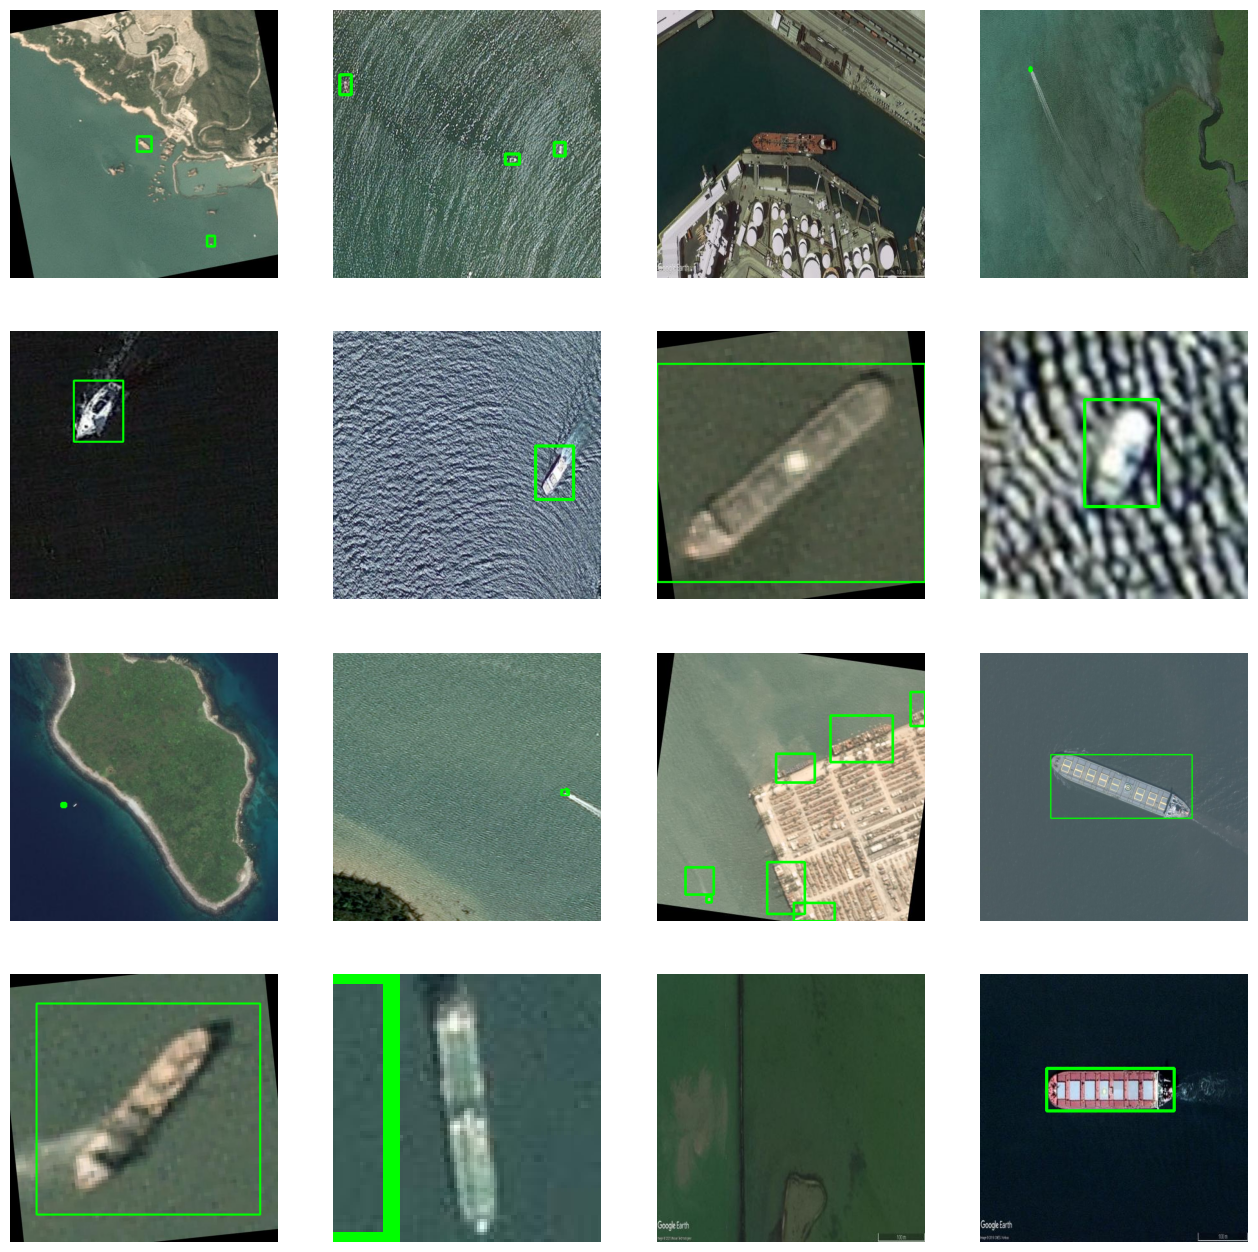

In [4]:
# Define the paths to the images and labels directories
train_images = "input/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "input/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "input/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "input/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "input/ships-in-aerial-images/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# Image Metadata

In [5]:
# Load an image using OpenCV
image = cv2.imread("input/ships-in-aerial-images/ships-aerial-images/test/images/02e39612d_jpg.rf.cc5483bb711f080d12b644ff62cf977a.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 768x768 and 3 channels.


# Model Training

In [6]:
 # Loading a pretrained model
model = YOLO('yolo11n.pt')

# # # Training the model
# model.train(data = "data.yaml",
#             epochs = 1,
#             imgsz = height,
#             seed = 42,
#             batch = 8,
#             workers = 4)

In [7]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    #detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

In [8]:
# import cv2

# # Function to perform real-time ship detection from a video stream
# def ship_detect_real_time(video_source):
#     """
#     video_source: 0 for webcam, or path to a video file.
#     """
#     # Initialize video capture (0 for webcam or provide a video file path)
#     cap = cv2.VideoCapture(video_source)

#     if not cap.isOpened():
#         print("Error: Unable to open video source.")
#         return
    
#     while True:
#         # Read frame-by-frame from the video capture
#         ret, frame = cap.read()
#         if not ret:
#             print("Error: Unable to read frame.")
#             break

#         # Perform ship detection on the current frame
#         detect_result = model(frame)

#         # Plot the detection results on the frame
#         detect_img = detect_result[0].plot()

#         # Convert the image from BGR to RGB (if needed for further processing)
#         #detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

#         # Display the processed frame with detections
#         cv2.imshow('Real-Time Ship Detection', detect_img)

#         # Break the loop if 'q' is pressed
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     # Release the video capture and close windows
#     cap.release()
#     cv2.destroyAllWindows()

# # Example usage: 
# # Pass '0' to use the webcam or a video file path for a saved video
# #ship_detect_real_time(0)  # For webcam
# # Or use 'ship_detect_real_time('path/to/your/video.mp4')' for a video file


In [9]:
# import math

# def pixel_to_geo(x_center, y_center, lat_UAV, lon_UAV, altitude, fov, img_width, img_height):
#     # Tính chiều rộng mặt đất mà camera bao phủ
#     ground_width = 2 * altitude * math.tan(math.radians(fov / 2))
    
#     # Tính kích thước của 1 pixel trên mặt đất
#     pixel_size = ground_width / img_width
    
#     # Tính khoảng cách từ trung tâm khung hình đến vật thể
#     dx = (x_center - img_width / 2) * pixel_size
#     dy = (y_center - img_height / 2) * pixel_size
    
#     # Chuyển đổi sang tọa độ địa lý
#     lat_object = lat_UAV + (dy / 111320) # 1 độ vĩ độ tương đương với khoảng 111.32 km
#     lon_object = lon_UAV + (dx / (111320 * math.cos(math.radians(lat_UAV))))
    
#     return lat_object, lon_object


In [10]:
import cv2
import math

# Function to perform real-time ship detection from a video stream
def ship_detect_real_time(video_source):
    """
    video_source: 0 for webcam, or path to a video file.
    """
    # Initialize video capture (0 for webcam or provide a video file path)
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Error: Unable to open video source.")
        return
    
    frame_count = 0
    while True:
        # Read frame-by-frame from the video capture
        ret, frame = cap.read()
        if not ret:
            print("Error: Unable to read frame.")
            break

        # Skip every 3nd frame to improve speed (adjust as needed)
        frame_count += 1
        if frame_count % 3 != 0:
            continue

        # Perform ship detection on the current frame
        detect_result = model(frame)  # The YOLO model is applied to the frame

        # Ensure the detection results are not empty
        if len(detect_result) > 0:
            # Access the first result (since detect_result is a list)
            detections = detect_result[0].boxes  # YOLOv8 stores boxes in .boxes
            
            # Iterate over each detection (bounding box)
            for box in detections:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get the bounding box coordinates
                confidence = box.conf[0]  # Confidence score
                class_id = int(box.cls[0])  # Class ID

                # Check if the object detected is a boat (class_id corresponds to 'boat')
                object_name = model.names[class_id]
                
                if confidence > 0.8 and object_name == "boat":
                    # Calculate the center of the bounding box
                    x_center = (x1 + x2) / 2
                    y_center = (y1 + y2) / 2

                    # Convert pixel coordinates to geographic coordinates (latitude, longitude)
                    latitude, longitude = pixel_to_geo(x_center, y_center, lat_UAV, lon_UAV, altitude, fov, img_width, img_height)

                    # Draw bounding box around the boat
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

                    # Add latitude and longitude as text on the bounding box
                    cv2.putText(frame, f"Lat: {latitude:.6f}, Lon: {longitude:.6f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Display the processed frame with detections
        cv2.imshow('Real-Time Ship Detection', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture and close windows
    cap.release()
    cv2.destroyAllWindows()

# Dummy pixel-to-geographic conversion function for example
def pixel_to_geo(x_center, y_center, lat_UAV, lon_UAV, altitude, fov, img_width, img_height):
    # Tính chiều rộng mặt đất mà camera bao phủ
    ground_width = 2 * altitude * math.tan(math.radians(fov / 2))
    
    # Tính kích thước của 1 pixel trên mặt đất
    pixel_size = ground_width / img_width
    
    # Tính khoảng cách từ trung tâm khung hình đến vật thể
    dx = (x_center - img_width / 2) * pixel_size
    dy = (y_center - img_height / 2) * pixel_size
    
    # Chuyển đổi sang tọa độ địa lý
    lat_object = lat_UAV + (dy / 111320) # 1 độ vĩ độ tương đương với khoảng 111.32 km
    lon_object = lon_UAV + (dx / (111320 * math.cos(math.radians(lat_UAV))))
    
    return lat_object, lon_object


# Example usage:
lat_UAV = 37.7749  # Example latitude of UAV
lon_UAV = -122.4194  # Example longitude of UAV
altitude = 100  # Example altitude in meters
fov = 90  # Field of view in degrees
img_width = 1280  # Width of the video frame
img_height = 720  # Height of the video frame

# Run the optimized real-time ship detection
ship_detect_real_time("test.mp4")


0: 384x640 3 boats, 41.2ms
Speed: 1.4ms preprocess, 41.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 32.6ms
Speed: 1.1ms preprocess, 32.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 31.8ms
Speed: 1.1ms preprocess, 31.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 29.3ms
Speed: 1.0ms preprocess, 29.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 31.7ms
Speed: 0.9ms preprocess, 31.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 33.8ms
Speed: 1.2ms preprocess, 33.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 36.0ms
Speed: 1.3ms preprocess, 36.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 30.7ms
Speed: 1.1ms preprocess, 30.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


2024-10-02 17:37:33.887 Python[53557:1940489] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-02 17:37:33.887 Python[53557:1940489] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


0: 384x640 3 boats, 31.9ms
Speed: 1.3ms preprocess, 31.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 boats, 37.5ms
Speed: 1.2ms preprocess, 37.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 boats, 28.3ms
Speed: 1.1ms preprocess, 28.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 boats, 31.2ms
Speed: 1.2ms preprocess, 31.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 boats, 31.1ms
Speed: 1.1ms preprocess, 31.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 boats, 31.4ms
Speed: 1.3ms preprocess, 31.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 boats, 32.1ms
Speed: 1.1ms preprocess, 32.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 boats, 35.3ms
Speed: 1.0ms preprocess, 35.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



In [11]:
# import random

# # Define the directory where the custom images are stored
# custom_image_dir = 'input/ships-in-aerial-images/ships-aerial-images/test/images'

# # Get the list of image files in the directory
# image_files = os.listdir(custom_image_dir)

# # Select 16 random images from the list
# n = 16
# n_row = 4
# n_col = 4
# selected_images = random.sample(image_files, n)

# # Create a figure with subplots for each image
# fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15, 15))

# # Iterate over the selected images and plot each one
# for i, img_file in enumerate(selected_images):
    
#     # Compute the row and column index of the current subplot
#     row_idx = i // n_row
#     col_idx = i % n_row
    
#     # Load the current image and run object detection
#     img_path = os.path.join(custom_image_dir, img_file)
#     detect_img = ship_detect(img_path)
    
#     # Plot the current image on the appropriate subplot
#     axes[row_idx, col_idx].imshow(detect_img)
#     axes[row_idx, col_idx].axis('off')

# # Adjust the spacing between the subplots
# plt.subplots_adjust(wspace=0.05, hspace=0.05)
